[Jupyter Book "Argosy"](https://robfatland.github.io/argosy)


This project near-term goal is described in `~/argosy/ooiproject.md` 


Re-engaging after a time gap? Here are some suggested reconnect steps:

- ...open 2 or 3 Ubuntu `bash` shells
    - The Dell CA sees WSL ~ as well as /mnt/c/Users/uname
    - The Surface is yet to be verified for WSL
- ...for presentation development: via `do` open working slides
- ...synch `argosy` and `oceanography` GitHub repos to both Dev machines
- ...review and `activate` appropriate Python environments
- ...mount the S3 bucket as a local file folder using the alias from `.bash_aliases`
- ...open VS Code with a CA extension; synch up using `ooiproject.md`

## Shallow Profiler


#### Build commands


- `cd ~/argosy`
- `jupyter-book build .`
- `ghp-import -n -p -f _build/html`



### Goals, constraints


Goal: Characterize the upper 200 meters of the water column (the photic / epipelagic zone) nine
times per day at three sites: sensors described below. Observing interval is
2015 to present.


The scope of this data analysis procedure is constrained by...
- ...shallow profiler data only; no platform data and no data from other RCA sites
- ...ascent only: Optimize undisturbed water
    - Exception: Some sensors only operate on descent (nitrate for example)
- ...three RCA shallow profiler sites (with abbreviations)
    - Slope base (sb): Base of the continental shelf
    - Oregon offshore (oo): On the continental shelf
    - Axial base (ab): At Axial seamount
- ...full-resolution datasets as source
    - Data supplied by OOINET
    - Resampling strategies as described below
- ...dual dimension strategy: time dimension for profiles, depth dimension for an individual profile 


Ascent and descent interval metadata is available from GitHub.
    - Wendi Ruef (RCA): `https://github.com/OOI-CabledArray/profileIndices`

## OOI data access


See Reserve notebook


## Sensor types


### Shallow profiler "science pod"


- CTD
- 3 Wavelength Fluorometer
- Dissolved Oxygen
- Nitrate
- Photosynthetically Available Radiation
- Seawater pH
- Single Point Velocity Meter
- Spectral Irradiance
- Spectrophotometer
- pCO2 Water


### Profiler Platform (200m)


These sensors are not the immediate concern.


- 2-Wavelength Fluorometer
- 5-Beam Velocity Profiler (500kHz)
- 5-Beam Velocity Profiler (600kHz)
- Broadband Acoustic Receiver (Hydrophone)
- CTD
- Digital Still Camera
- Dissolved Oxygen
- Seawater pH
- Velocity Profiler (150kHz)

In [ ]:
import xarray as xr

In [14]:
ds = xr.open_dataset('~/argosy/tmpdata/parexample.nc')
ds

<xarray.Dataset> Size: 1GB
Dimensions:                        (obs: 9981257)
Coordinates:
  * obs                            (obs) int32 40MB 0 1 2 ... 9981255 9981256
    lon                            (obs) float64 80MB ...
    depth                          (obs) float64 80MB ...
    time                           (obs) datetime64[ns] 80MB ...
    lat                            (obs) float64 80MB ...
Data variables:
    par_counts_output_qc_results   (obs) uint8 10MB ...
    int_ctd_pressure               (obs) float64 80MB ...
    par_counts_output_qc_executed  (obs) uint8 10MB ...
    pitch                          (obs) float32 40MB ...
    par_counts_output              (obs) float64 80MB ...
    roll                           (obs) float32 40MB ...
    par_measured                   (obs) float32 40MB ...
    deployment                     (obs) int32 40MB ...
    id                             (obs) |S36 359MB ...
Attributes: (12/55)
    node:                            SF01A
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               streamed
    stream:                          parad_sa_sample
    ...                              ...
    geospatial_lon_max:              -125.389741
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.1
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.1
    geospatial_vertical_positive:    down

In [15]:
# instruments = ['ctd', 'dissolvedoxygen', 'nitrate']
# instruments = ['nitratedark', 'fluorometer', 'pco2', 'ph']
instruments = ['par']
# instruments = []

for instrument in instruments: 
    ds = xr.open_dataset('~/argosy/tmpdata/' + instrument + 'example.nc')
    print('\n\n' + instrument)
    print('Dimensions:')
    for dim, size in ds.dims.items():
        print(f'  {dim}: {size}')
    print('\nCoordinates:')
    for coord in ds.coords:
        print(coord)
    print('\nVariables:')
    for var in ds.data_vars:
        print(f'  {var}')
    print('\nAttributes')
    for attr in ds.attrs:
        print(f'  {attr}')
    print('\n'*5)



par
Dimensions:
  obs: 9981257

Coordinates:
obs
lon
depth
time
lat

Variables:
  par_counts_output_qc_results
  int_ctd_pressure
  par_counts_output_qc_executed
  pitch
  par_counts_output
  roll
  par_measured
  deployment
  id

Attributes
  node
  comment
  publisher_email
  sourceUrl
  collection_method
  stream
  featureType
  creator_email
  publisher_name
  date_modified
  keywords
  cdm_data_type
  references
  Metadata_Conventions
  date_created
  id
  requestUUID
  contributor_role
  summary
  keywords_vocabulary
  institution
  naming_authority
  feature_Type
  infoUrl
  license
  contributor_name
  uuid
  creator_name
  title
  sensor
  standard_name_vocabulary
  acknowledgement
  Conventions
  project
  source
  publisher_url
  creator_url
  nodc_template_version
  subsite
  processing_level
  history
  time_coverage_start
  time_coverage_end
  time_coverage_resolution
  geospatial_lat_min
  geospatial_lat_max
  geospatial_lat_units
  geospatial_lat_resolution
  geospati

/tmp/ipykernel_205833/1956313638.py:10: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim, size in ds.dims.items():


Here is some CTD exploratory code

```
fnm = 'some_ctd_file.nc'
fpath = '~/some/path/to/ctd/'
f = fpath + fnm

ds = xr.open_dataset(f)
# ds produces Dimension: row (9.4M), Coords: nada, Data variables: time, salinity, qc, z
#   and Attributes: 44 in number. Let's move time to Coordinate / Dimension

ds = ds.swap_dims({'obs':'time'})
ds.time[-10:-1]
```

In [1]:
import xarray as xr
import pandas as pd

# Load profile times
profiles = pd.read_csv('/home/rob/profileIndices/RS01SBPS_profiles_2018.csv')
profiles['start'] = pd.to_datetime(profiles['start'])
profiles['peak'] = pd.to_datetime(profiles['peak'])

# Load CTD data
ds = xr.open_dataset('/home/rob/argosy/tmpdata/ctdexample.nc')

print('CTD dataset time range:')
print(f'  Min: {ds.time.min().values}')
print(f'  Max: {ds.time.max().values}')

print('\nFirst 4 profile times from CSV:')
for i in range(4):
    print(f'  Profile {profiles.iloc[i]["profile"]}: {profiles.iloc[i]["start"]} to {profiles.iloc[i]["peak"]}')

print('\nDepth range:')
print(f'  Min: {ds.depth.min().values}')
print(f'  Max: {ds.depth.max().values}')

print('\nTemperature range:')
print(f'  Min: {ds.sea_water_temperature.min().values}')
print(f'  Max: {ds.sea_water_temperature.max().values}')

# Check if first profile overlaps with data
profile = profiles.iloc[0]
mask = (ds.time >= profile['start']) & (ds.time <= profile['peak'])
print(f'\nData points in first profile: {mask.sum().values}')

FileNotFoundError: [Errno 2] No such file or directory: b'/home/rob/argosy/tmpdata/ctdexample.nc'

In [5]:
import xarray as xr
import pandas as pd

# Load profile times
profiles = pd.read_csv('/home/rob/profileIndices/RS01SBPS_profiles_2018.csv')
profiles['start'] = pd.to_datetime(profiles['start'])
profiles['peak'] = pd.to_datetime(profiles['peak'])

# Load CTD data
ds = xr.open_dataset('/home/rob/argosy/tmpdata/ctdexample.nc')

ctd_start = pd.to_datetime(ds.time.min().values)
ctd_end = pd.to_datetime(ds.time.max().values)

print(f'CTD data range: {ctd_start} to {ctd_end}')

# Find profiles that overlap with CTD data
matching = profiles[(profiles['start'] >= ctd_start) & (profiles['peak'] <= ctd_end)]

print(f'\nFound {len(matching)} matching profiles')
print('\nFirst 4 matching profiles:')
for i in range(min(4, len(matching))):
    row = matching.iloc[i]
    print(f'  Profile {row["profile"]}: {row["start"]} to {row["peak"]}')

CTD data range: 2018-10-19 20:14:06.543980032 to 2018-11-06 23:59:59.302943232

Found 163 matching profiles

First 4 matching profiles:
  Profile 6227: 2018-10-19 20:43:00 to 2018-10-19 21:50:00
  Profile 6228: 2018-10-20 00:28:00 to 2018-10-20 01:35:00
  Profile 6229: 2018-10-20 02:43:00 to 2018-10-20 03:51:00
  Profile 6230: 2018-10-20 04:53:00 to 2018-10-20 06:01:00


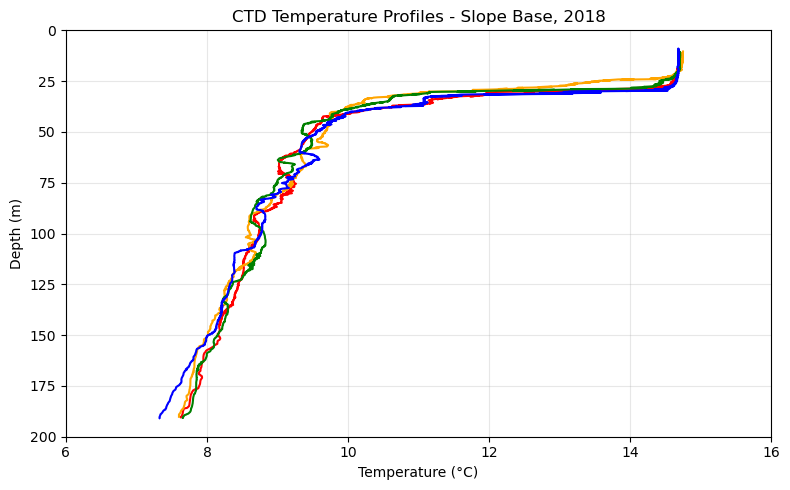

In [2]:
# Program "TemperatureChart"

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Load profile times and text > datetimes for columns 2, 3, 4
profiles = pd.read_csv('~/profileIndices/RS01SBPS_profiles_2018.csv')
profiles['start'] = pd.to_datetime(profiles['start'])
profiles['peak'] = pd.to_datetime(profiles['peak'])
profiles['end'] = pd.to_datetime(profiles['end'])

# Load CTD data
ds = xr.open_dataset('/home/rob/tmpdata/ctdexample.nc')

ds = ds.swap_dims({'obs':'time'})

# Find profiles that overlap with CTD data
ctd_start = pd.to_datetime(ds.time.min().values)
ctd_end = pd.to_datetime(ds.time.max().values)
matching = profiles[(profiles['start'] >= ctd_start) & (profiles['peak'] <= ctd_end)]

# Select 4 consecutive profiles
colors = ['red', 'orange', 'green', 'blue']
fig, ax = plt.subplots(figsize=(8, 5))

for i in range(4):
    profile = matching.iloc[i]
    start_time = profile['start']
    peak_time = profile['peak']
    
    # Select data for this profile (ascent: start to peak)
    mask = (ds.time >= start_time) & (ds.time <= peak_time)
    profile_data = ds.where(mask, drop=True)
    
    # Depth is positive
    depth = profile_data['depth']
    
    # Plot temperature vs depth
    ax.plot(profile_data['sea_water_temperature'], depth, color=colors[i])

ax.set_ylim(200, 0)
ax.set_xlim(6, 16)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Depth (m)')
ax.set_title('CTD Temperature Profiles - Slope Base, 2018')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/rob/ctd_temperature_profiles.png', dpi=150)
plt.show()

In [3]:
ds.data_vars.keys()

KeysView(Data variables:
    sea_water_pressure_qc_results                      (time) uint8 ...
    sea_water_pressure                                 (time) float64 ...
    sea_water_electrical_conductivity_qartod_results   (time) uint8 ...
    corrected_dissolved_oxygen                         (time) float64 ...
    sea_water_pressure_qc_executed                     (time) uint8 ...
    sea_water_practical_salinity_qc_executed           (time) uint8 ...
    driver_timestamp                                   (time) datetime64[ns] ...
    id                                                 (time) |S36 ...
    conductivity                                       (time) float64 ...
    temperature                                        (time) float64 ...
    sea_water_temperature_qartod_results               (time) uint8 ...
    corrected_dissolved_oxygen_qc_executed             (time) uint8 ...
    corrected_dissolved_oxygen_qc_results              (time) uint8 ...
    pressure_temp      